In [1]:
%load_ext autoreload
%autoreload 2

In [25]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from pprint import pprint
import seaborn as sns

sys.path.append("../")
from stocks_feed.dataloader import Stock, Index

load_dotenv() 

True

In [17]:
idx = Index()

In [18]:
df_sp500 = idx.df

Text(0.5, 1.0, 'SP500 Closing Prices')

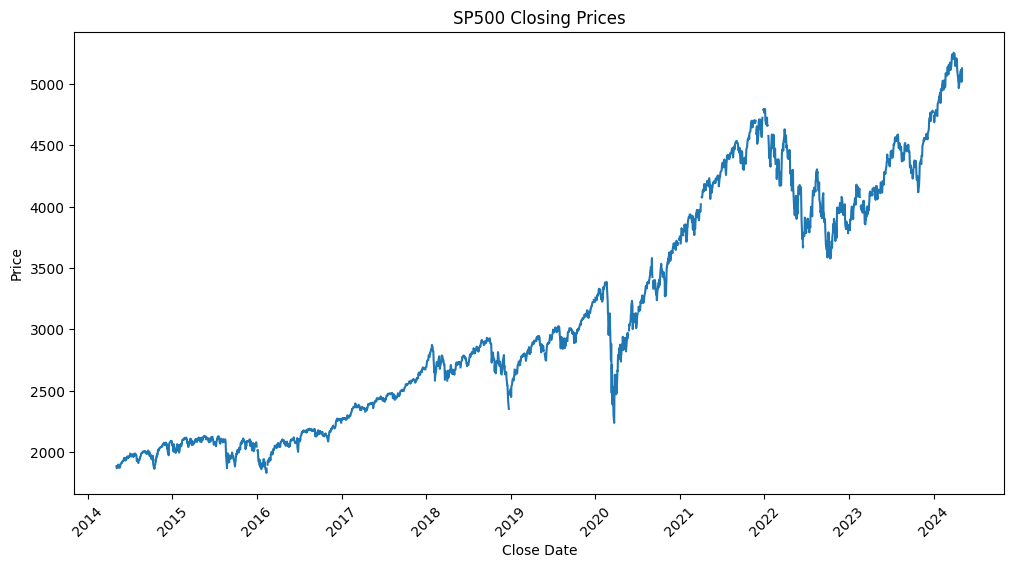

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.plot(df_sp500.index, df_sp500["close"])

# Set the x-axis label and rotate the tick labels
ax.set_xlabel('Close Date')
plt.xticks(rotation=45)

# Set the y-axis label
ax.set_ylabel('Price')

# Set the plot title
plt.title('SP500 Closing Prices')

Text(0.5, 1.0, 'SP500 Daily Returns (%)')

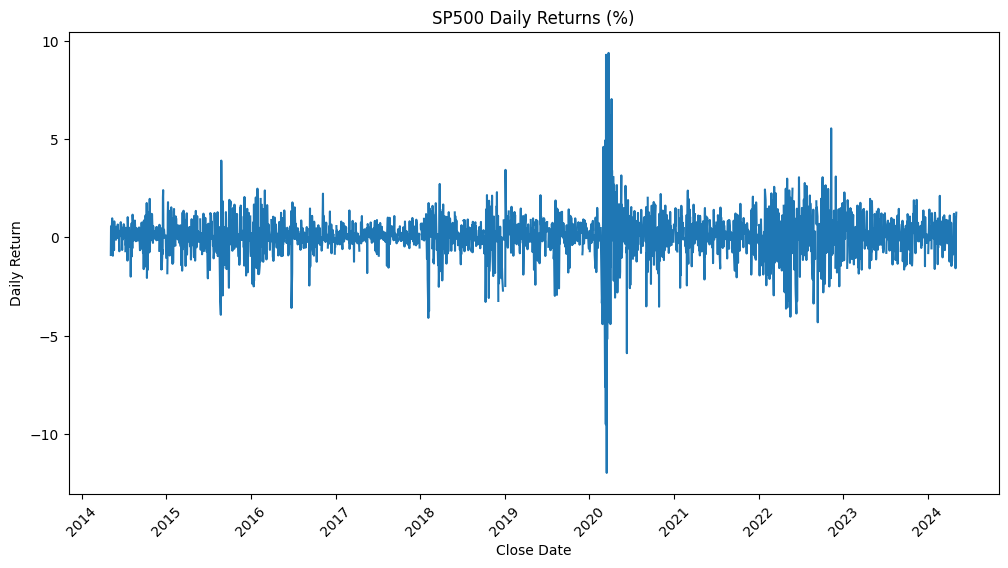

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.plot(df_sp500.index, df_sp500["daily_return"] * 100)

# Set the x-axis label and rotate the tick labels
ax.set_xlabel('Close Date')
plt.xticks(rotation=45)

# Set the y-axis label
ax.set_ylabel('Daily Return')

# Set the plot title
plt.title('SP500 Daily Returns (%)')

In [21]:
s = Stock("WMT", "2023-01-01", "2023-12-31")

In [22]:
s.df

,v,vw,o,c,h,l,t,n,ticker,close_lag_1,daily_return
2023-01-03,17249685.0,47.6923,47.5167,47.8667,47.9033,47.3633,1672722000000,93339,WMT,NaN,NaN
2023-01-04,13338909.0,47.7766,47.8067,47.9200,48.0167,47.3567,1672808400000,70023,WMT,47.8667,0.001114
2023-01-05,13274421.0,47.7787,47.8200,47.7567,48.0433,47.5500,1672894800000,64290,WMT,47.9200,-0.003408
2023-01-06,21231807.0,48.8670,48.2000,48.9267,49.1833,48.0800,1672981200000,91719,WMT,47.7567,0.024499
2023-01-09,17756619.0,48.6350,48.7733,48.3167,49.2867,48.2667,1673240400000,86644,WMT,48.9267,-0.012468
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,19405641.0,52.2338,51.8167,52.2167,52.3833,51.7184,1703221200000,91668,WMT,51.6000,0.011952
2023-12-26,11679963.0,52.1495,52.2167,52.1367,52.3300,52.0367,1703566800000,66850,WMT,52.2167,-0.001532
2023-12-27,19895964.0,52.5353,52.1033,52.6267,52.6483,52.0533,1703653200000,86009,WMT,52.1367,0.009398
2023-12-28,16776066.0,52.5901,52.5900,52.5233,52.7767,52.5000,1703739600000,81975,WMT,52.6267,-0.001965


In [26]:
df_test = df_sp500.join(s.df, how="inner", lsuffix="_SP500", rsuffix="_WMT")

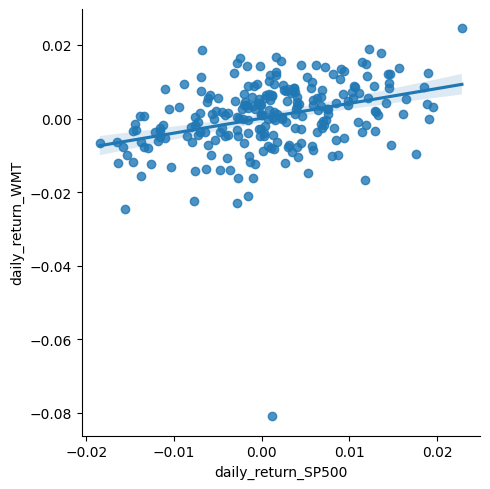

In [27]:
sns.lmplot(df_test, x="daily_return_SP500", y="daily_return_WMT")